In [1]:
import re
from datetime import datetime, timedelta
import os 
import argparse
from collections import defaultdict,Counter
import json 
import csv
from tqdm import tqdm
from typing import List

In [2]:
""" script modification du time code // ajout d'une seconde aux sous-titre """

" script modification du time code // ajout d'une seconde aux sous-titre "

In [3]:
import os

def lister_fichiers(chemin: str) -> list:
    """
    La fonction prend en entrée le nom d'un dossier et renvoie la liste des fichiers qu'il contient.

    Args:
        chemin (str): nom du dossier

    Returns:
        list : liste des chemins des fichiers contenus dans le dossier

    Examples:
        lister_fichiers("subtitles") = ["subtitles/files.json",...]
    """
    try:
        if os.path.isdir(chemin):
            # Si le chemin est un dossier, retourner la liste des fichiers dans le dossier
            fichiers = [os.path.join(chemin, f) for f in os.listdir(chemin) if os.path.isfile(os.path.join(chemin, f))]
            return fichiers
    except Exception as e:
        print(f"Erreur : {e}")
        return []



In [4]:
def convertir_chaine_en_temps(temps_str):
    # Formatter la chaîne de caractères en timedelta
    temps_delta = datetime.strptime(temps_str, "%H:%M:%S.%f").time()

    # Créer une date fictive pour stocker le timedelta
    date_fictive = datetime.combine(datetime.min, temps_delta)

    # Formater la sortie pour afficher uniquement l'heure, les minutes, les secondes et les millisecondes
    temps_formate = date_fictive.strftime("%H:%M:%S.%f")[:-3]

    return temps_formate


In [26]:
from datetime import datetime, timedelta

def convertir_chaine_en_temps(temps_str):
    # Formatter la chaîne de caractères en timedelta
    temps_delta = datetime.strptime(temps_str, "%H:%M:%S.%f")

    # Extraire l'heure, les minutes, les secondes et les microsecondes
    heures, minutes, secondes = temps_delta.hour, temps_delta.minute, temps_delta.second
    microsecondes = temps_delta.microsecond

    # Formater la sortie pour afficher uniquement l'heure, les minutes, les secondes et les millisecondes
    temps_formate = f"{heures:02d}:{minutes:02d}:{secondes:02d}.{microsecondes // 1000:03d}"

    return temps_formate


In [5]:
def ajouter_une_seconde(temps_str):
    #convertir str en time : 

    temps_objet = datetime.strptime(temps_str, "%H:%M:%S.%f").time()

    # Convertir l'objet time en datetime pour pouvoir effectuer l'opération d'ajout
    temps_datetime = datetime.combine(datetime.min, temps_objet)

    # Ajouter 1 seconde à l'objet datetime
    temps_datetime = temps_datetime + timedelta(seconds=1)

    # Extraire l'objet time du résultat
    temps_objet_modifie = temps_datetime.time()

    #Formater la sortie (00:00:00.000)
    temps_formate = temps_objet_modifie.strftime("%H:%M:%S.%f")[:-3]


    return temps_formate

In [6]:
with open("_Lx00No3bZc.vtt","r") as file:
     with open("new_sub_1sec.vtt","w") as output:
        content = ""
        line = file.readline()
        while line:
            if line.startswith("0"):
                timing_line = line.strip().split(' --> ')
                start_time, end_time = timing_line
                print(f"Timecode initial : {type(start_time)}, {end_time}")
                start_time = convertir_chaine_en_temps(start_time)
                end_time = convertir_chaine_en_temps(end_time)
                print(f"Conversion en temps objet : {type(start_time)}, {end_time}")
                start_time = ajouter_une_seconde(start_time)
                end_time = ajouter_une_seconde(end_time)
                print(f"Ajout d'une seconde: {type(start_time)}, {end_time}")
                output.write(f"{start_time} --> {end_time}\n")
            else:
                output.write(line)
            line = file.readline()

Timecode initial : <class 'str'>, 00:00:11.000
Conversion en temps objet : <class 'str'>, 00:00:11.000
Ajout d'une seconde: <class 'str'>, 00:00:12.000
Timecode initial : <class 'str'>, 00:00:14.000
Conversion en temps objet : <class 'str'>, 00:00:14.000
Ajout d'une seconde: <class 'str'>, 00:00:15.000
Timecode initial : <class 'str'>, 00:00:17.280
Conversion en temps objet : <class 'str'>, 00:00:17.280
Ajout d'une seconde: <class 'str'>, 00:00:18.280
Timecode initial : <class 'str'>, 00:00:21.480
Conversion en temps objet : <class 'str'>, 00:00:21.480
Ajout d'une seconde: <class 'str'>, 00:00:22.480
Timecode initial : <class 'str'>, 00:00:24.440
Conversion en temps objet : <class 'str'>, 00:00:24.440
Ajout d'une seconde: <class 'str'>, 00:00:25.440
Timecode initial : <class 'str'>, 00:00:27.040
Conversion en temps objet : <class 'str'>, 00:00:27.040
Ajout d'une seconde: <class 'str'>, 00:00:28.040
Timecode initial : <class 'str'>, 00:00:31.280
Conversion en temps objet : <class 'str'>

In [7]:
list_files = lister_fichiers("subtitles/")

In [8]:
print(list_files)

['subtitles/8IqhpOiPMxY.json', 'subtitles/aTtX70EXGVo.json', 'subtitles/K7UFz1gAzAQ.json', 'subtitles/CxgdUjywiDE.json', 'subtitles/ky_4nkig3JI.json', 'subtitles/6fsIXStr6w4.json', 'subtitles/qVYiLFZojws.json', 'subtitles/wMDNQG0oA7k.json', 'subtitles/0IViLqFmgIY.json', 'subtitles/1AjRdJ5d_Ww.json', 'subtitles/1ILfD_BjLNk.json', 'subtitles/nD9wATmlLkI.json', 'subtitles/3TEX9ruhaXo.json', 'subtitles/Sy7uU8DAsfs.json', 'subtitles/KhxgwQDJpCg.json', 'subtitles/_PJ2xR9-o94.json', 'subtitles/_Lx00No3bZc.json', 'subtitles/jNouEg1YgKQ.json', 'subtitles/aKGSwBZpRXw.json', 'subtitles/CDsP8gaVGbg.json', 'subtitles/NiQIWYxm8EQ.json', 'subtitles/bz7gcxK4YxY.json', 'subtitles/Wn_c9fnOItw.json', 'subtitles/LicjiPStTmU.json', 'subtitles/j6bYWLKPuPs.json', 'subtitles/onVujB43-dw.json', 'subtitles/pDAM2zcA24U.json', 'subtitles/aaYtgrh_uDo.json', 'subtitles/dGxmroECIlU.json', 'subtitles/hO5I1a3jlgo.json', 'subtitles/B62_uSapEhI.json', 'subtitles/vlNNOM4i3Q0.json', 'subtitles/1MHphyCtLLE.json', 'subtitle

In [9]:
list_files = lister_fichiers("cr_audio_aligned/")

for files in list_files:
    new_file = "plus_one_sec/" + str(os.path.splitext(os.path.basename(files))[0]) +".vtt"
    with open(files,"r") as file:
        with open(new_file,"w") as output:
            content = ""
            line = file.readline()
            while line:
                if line.startswith("01:") or line.startswith("00:"):
                    timing_line = line.strip().split(' --> ')
                    start_time, end_time = timing_line
                    start_time = convertir_chaine_en_temps(start_time)
                    end_time = convertir_chaine_en_temps(end_time)
                    start_time = ajouter_une_seconde(start_time)
                    end_time = ajouter_une_seconde(end_time)
                    output.write(f"{start_time} --> {end_time}\n")
                else:
                    output.write(line)
                line = file.readline()

In [10]:
nom_fichier_sans_extension = os.path.splitext(os.path.basename("subtitles/-LhfYZ1ihpI.json"))[0]
print(nom_fichier_sans_extension)


-LhfYZ1ihpI


In [11]:
""" ajouter bruit sous-titre mediapi"""

' ajouter bruit sous-titre mediapi'

In [12]:
import random

In [13]:
list = [1,2,3]
print(random.choice(list))

2


In [14]:
print(random.randrange(-5,10,1))

-2


In [15]:
print(random.seed(5))

None


In [16]:
from scipy.stats import norm

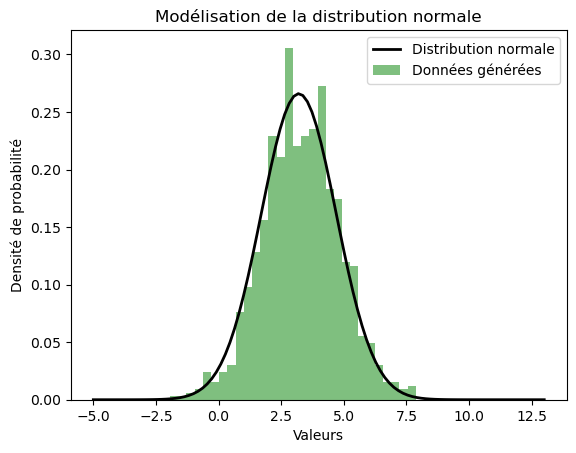

In [6]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# Définir les nouvelles informations sur la distribution normale
moyenne = 3.2
ecart_type = 1.5
borne_inf = -5
borne_sup = 13

# Générer des données à partir de la distribution normale dans la plage spécifiée
donnees = norm.rvs(loc=moyenne, scale=ecart_type, size=1000)
donnees = donnees[(donnees >= borne_inf) & (donnees <= borne_sup)]

# Afficher l'histogramme des données générées
plt.hist(donnees, bins=30, density=True, alpha=0.5, color='g')

# Tracer la fonction de densité de probabilité de la distribution normale
x = np.linspace(borne_inf, borne_sup, 100)
p = norm.pdf(x, moyenne, ecart_type)
plt.plot(x, p, 'k', linewidth=2)

# Ajouter des étiquettes et une légende
plt.title("Modélisation de la distribution normale")
plt.xlabel("Valeurs")
plt.ylabel("Densité de probabilité")
plt.legend(['Distribution normale', 'Données générées'])

# Afficher le graphique
plt.show()


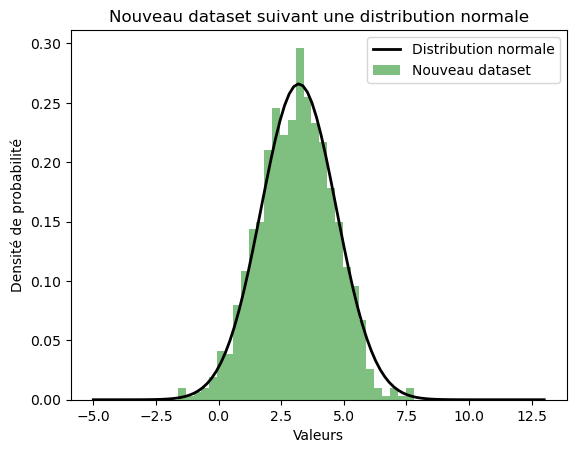

In [18]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Définir les paramètres de la distribution normale
moyenne = 3.2
ecart_type = 1.5
borne_inf = -5
borne_sup = 13

# Générer un nouveau dataset suivant la distribution normale
nouveau_dataset = norm.rvs(loc=moyenne, scale=ecart_type, size=1000)
nouveau_dataset = nouveau_dataset[(nouveau_dataset >= borne_inf) & (nouveau_dataset <= borne_sup)]

# Afficher l'histogramme du nouveau dataset
plt.hist(nouveau_dataset, bins=30, density=True, alpha=0.5, color='g')

# Tracer la fonction de densité de probabilité de la distribution normale
x = np.linspace(borne_inf, borne_sup, 100)
p = norm.pdf(x, moyenne, ecart_type)
plt.plot(x, p, 'k', linewidth=2)

# Ajouter des étiquettes et une légende
plt.title("Nouveau dataset suivant une distribution normale")
plt.xlabel("Valeurs")
plt.ylabel("Densité de probabilité")
plt.legend(['Distribution normale', 'Nouveau dataset'])

# Afficher le graphique
plt.show()


In [7]:
from scipy.stats import norm

# Définir les paramètres de la distribution normale
moyenne = 0
ecart_type = 1

# Générer un seul nombre aléatoire suivant la distribution normale
decalage_temporel = norm.rvs(loc=moyenne, scale=ecart_type, size=1)[0]

# Afficher le décalage temporel généré
print(f"Décalage temporel généré : {decalage_temporel:.2f} secondes")


Décalage temporel généré : -2.64 secondes


In [8]:
def convertir_temps(chaine_temps):
    # Convertir la chaîne de temps en un objet timedelta
    duree = timedelta(seconds=float(chaine_temps))

    # Formater la durée sous forme de chaîne dans le format "00:00:00.000"
    temps_formate = str(duree)

    # Ajouter des zéros pour remplir les champs manquants
    parties_temps = temps_formate.split(".")

    # Vérifier si la liste a une partie fractionnaire
    if len(parties_temps) > 1:
        heures, minutes, secondes = map(int, parties_temps[0].split(":"))
        millisecondes = parties_temps[1][:3].ljust(3, '0')
    else:
        heures, minutes, secondes = map(int, temps_formate.split(":"))
        millisecondes = "000"

    temps_final = f"{heures:02d}:{minutes:02d}:{secondes:02d}.{millisecondes}"

    return temps_final


In [9]:
def change_timecode(temps_str,decalage):
    #convertir str en time : 

    temps_objet = datetime.strptime(temps_str, "%H:%M:%S.%f").time()

    # Convertir l'objet time en datetime pour pouvoir effectuer l'opération d'ajout
    temps_datetime = datetime.combine(datetime.min, temps_objet)

    # Ajouter 1 seconde à l'objet datetime
    temps_datetime = temps_datetime + timedelta(seconds=decalage_temporel)

    # Extraire l'objet time du résultat
    temps_objet_modifie = temps_datetime.time()

    #Formater la sortie (00:00:00.000)
    temps_formate = temps_objet_modifie.strftime("%H:%M:%S.%f")[:-3]


    return temps_formate

In [22]:
files_list = lister_fichiers("mediapi/subtitles/")

In [23]:
files_list

['mediapi/subtitles/d3fb5f132c.fr.vtt',
 'mediapi/subtitles/0f60e8cbe1.fr.vtt',
 'mediapi/subtitles/f77e53be0f.fr.vtt',
 'mediapi/subtitles/875f6e3836.fr.vtt',
 'mediapi/subtitles/a1e928bf06.fr.vtt',
 'mediapi/subtitles/724e4de2fd.fr.vtt',
 'mediapi/subtitles/eb7ea723a8.fr.vtt',
 'mediapi/subtitles/d033b65512.fr.vtt',
 'mediapi/subtitles/aa652b7e98.fr.vtt',
 'mediapi/subtitles/bdfbbbc0f9.fr.vtt',
 'mediapi/subtitles/1111b1b3e2.fr.vtt',
 'mediapi/subtitles/0422a33fd6.fr.vtt',
 'mediapi/subtitles/dccdecda4e.fr.vtt',
 'mediapi/subtitles/fc96e87bce.fr.vtt',
 'mediapi/subtitles/e26877a20c.fr.vtt',
 'mediapi/subtitles/08758ef2bd.fr.vtt',
 'mediapi/subtitles/da5b9dad23.fr.vtt',
 'mediapi/subtitles/304515a36e.fr.vtt',
 'mediapi/subtitles/1ed31053f9.fr.vtt',
 'mediapi/subtitles/8d4845fdc5.fr.vtt',
 'mediapi/subtitles/9648e8f26c.fr.vtt',
 'mediapi/subtitles/733528f394.fr.vtt',
 'mediapi/subtitles/a86909e404.fr.vtt',
 'mediapi/subtitles/8343bd9f33.fr.vtt',
 'mediapi/subtitles/a94931a5d5.fr.vtt',


In [13]:
files_list = []
with open("name_sub.txt",'r') as f:
    for line in f:
        files_list.append(line.strip())


In [14]:
print(len(files_list))

3139


In [20]:
# Définir les paramètres de la distribution normale
moyenne = 0
ecart_type = 1
borne_inf = -5
borne_sup = 13


for file in files_list:
    new_file = "non_aligned_mediapi_sent_seg/" + str(os.path.splitext(os.path.basename(file))[0]) +".vtt"
    print(file,new_file)
    with open(file,"r") as file:
        with open(new_file,"w") as output:
            content = ""
            line = file.readline()
            while line:
                if line.startswith("00:") or line.startswith("01:") or line.startswith("02:"):
                    #print(line)
                    decalage_temporel = norm.rvs(loc=moyenne, scale=ecart_type, size=1)[0]
                    timing_line = line.strip().split(' --> ')
                    start_time, end_time = timing_line
                    start_time = convertir_chaine_en_temps(start_time)
                    end_time = convertir_chaine_en_temps(end_time)
                    start_time = change_timecode(start_time,decalage_temporel)
                    end_time = change_timecode(end_time,decalage_temporel)
                    output.write(f"{start_time} --> {end_time}\n")
                else:
                    output.write(line)
                line = file.readline()

data/new_mediapi/67f46497f9.vtt non_aligned_mediapi_sent_seg/67f46497f9.vtt
data/new_mediapi/b41d730e81.vtt non_aligned_mediapi_sent_seg/b41d730e81.vtt
data/new_mediapi/0481a7f0af.vtt non_aligned_mediapi_sent_seg/0481a7f0af.vtt
data/new_mediapi/90d094256e.vtt non_aligned_mediapi_sent_seg/90d094256e.vtt
data/new_mediapi/b4823671dc.vtt non_aligned_mediapi_sent_seg/b4823671dc.vtt
data/new_mediapi/947de0ab18.vtt non_aligned_mediapi_sent_seg/947de0ab18.vtt
data/new_mediapi/7e92fc992c.vtt non_aligned_mediapi_sent_seg/7e92fc992c.vtt
data/new_mediapi/0ad3102bff.vtt non_aligned_mediapi_sent_seg/0ad3102bff.vtt
data/new_mediapi/60ab9aaef7.vtt non_aligned_mediapi_sent_seg/60ab9aaef7.vtt
data/new_mediapi/863dc1167b.vtt non_aligned_mediapi_sent_seg/863dc1167b.vtt
data/new_mediapi/a7756039fe.vtt non_aligned_mediapi_sent_seg/a7756039fe.vtt
data/new_mediapi/708db8d36a.vtt non_aligned_mediapi_sent_seg/708db8d36a.vtt
data/new_mediapi/152c562843.vtt non_aligned_mediapi_sent_seg/152c562843.vtt


OverflowError: date value out of range

In [22]:
for file in files_list:
    new_file = "non_aligned_mediapi_sent_seg/" + str(os.path.splitext(os.path.basename(file))[0]) + ".vtt"
    with open(file, "r") as file:
        with open(new_file, "w") as output:
            content = ""
            line = file.readline()
            while line:
                try:
                    if line.startswith("00:") or line.startswith("01:") or line.startswith("02:"):
                        decalage_temporel = norm.rvs(loc=moyenne, scale=ecart_type, size=1)[0]
                        timing_line = line.strip().split(' --> ')
                        start_time, end_time = timing_line
                        start_time = convertir_chaine_en_temps(start_time)
                        end_time = convertir_chaine_en_temps(end_time)
                        start_time = change_timecode(start_time,decalage_temporel)
                        end_time = change_timecode(end_time,decalage_temporel)
                        output.write(f"{start_time} --> {end_time}\n")
                    else:
                        output.write(line)
                except (OverflowError, ValueError) as e:
                    # Gérer l'erreur "date value out of range"
                    print(f"Erreur : {e}. Ligne non modifiée : {line} du fichier {file}")
                    output.write(line)
                    pass

                line = file.readline()

Erreur : date value out of range. Ligne non modifiée : 00:00:00.457 --> 00:00:15.480
 du fichier <_io.TextIOWrapper name='data/new_mediapi/b41d730e81.vtt' mode='r' encoding='UTF-8'>
Erreur : date value out of range. Ligne non modifiée : 00:00:00.771 --> 00:00:06.192
 du fichier <_io.TextIOWrapper name='data/new_mediapi/863dc1167b.vtt' mode='r' encoding='UTF-8'>
Erreur : date value out of range. Ligne non modifiée : 00:00:00.138 --> 00:00:11.480
 du fichier <_io.TextIOWrapper name='data/new_mediapi/a7756039fe.vtt' mode='r' encoding='UTF-8'>
Erreur : date value out of range. Ligne non modifiée : 00:00:00.640 --> 00:00:04.580
 du fichier <_io.TextIOWrapper name='data/new_mediapi/708db8d36a.vtt' mode='r' encoding='UTF-8'>
Erreur : date value out of range. Ligne non modifiée : 00:00:00.131 --> 00:00:08.374
 du fichier <_io.TextIOWrapper name='data/new_mediapi/152c562843.vtt' mode='r' encoding='UTF-8'>
Erreur : date value out of range. Ligne non modifiée : 00:00:00.402 --> 00:00:17.357
 du f

In [27]:
# version commentée
# Parcourt la liste des fichiers dans files_list
for file in files_list:
    # Construit le chemin pour le nouveau fichier VTT
    new_file = "non_aligned_mediapi_sent_seg/" + str(os.path.splitext(os.path.basename(file))[0]) + ".vtt"
    
    # Ouvre le fichier original en mode lecture
    with open(file, "r") as file:
        # Ouvre le nouveau fichier VTT en mode écriture
        with open(new_file, "w") as output:
            # Initialise une chaîne vide pour stocker le contenu modifié
            content = ""
            
            # Lit la première ligne du fichier original
            line = file.readline()
            last_end_time = None

            # Boucle pour parcourir chaque ligne du fichier original
            while line:
                try:
                    # Vérifie si la ligne commence par "00:", "01:", ou "02:"
                    if line.startswith("00:") or line.startswith("01:") or line.startswith("02:"):
                        # Génère un décalage temporel aléatoire
                        decalage_temporel = norm.rvs(loc=moyenne, scale=ecart_type, size=1)[0]

                        # Divise la ligne de timing en deux parties : start_time et end_time
                        timing_line = line.strip().split(' --> ')
                        start_time, end_time = timing_line

                        # Convertit les chaînes de temps en objets de temps
                        start_time = convertir_chaine_en_temps(start_time)
                        end_time = convertir_chaine_en_temps(end_time)

                        # Vérifie si start_time est inférieur à last_end_time
                        if last_end_time is not None and start_time < last_end_time:
                            # Si c'est le cas, ajuste start_time pour qu'il soit égal à last_end_time
                            start_time = last_end_time

                        # Applique le décalage temporel aux temps de début et de fin
                        start_time = change_timecode(start_time, decalage_temporel)
                        end_time = change_timecode(end_time, decalage_temporel)

                        # Écrit les nouvelles lignes de timing dans le fichier de sortie
                        output.write(f"{start_time} --> {end_time}\n")

                        # Met à jour last_end_time avec la nouvelle valeur de end_time
                        last_end_time = end_time
                    else:
                        # Si la ligne ne commence pas par "00:", "01:", ou "02:", la copie telle quelle
                        output.write(line)
                except (OverflowError, ValueError) as e:
                    # Gère les erreurs OverflowError et ValueError, affiche un message et copie la ligne non modifiée
                    print(f"Erreur : {e}. Ligne non modifiée : {line} du fichier {file}")
                    output.write(line)
                    pass

                # Lit la ligne suivante du fichier original
                line = file.readline()



Erreur : date value out of range. Ligne non modifiée : 00:00:00.457 --> 00:00:15.480
 du fichier <_io.TextIOWrapper name='data/new_mediapi/b41d730e81.vtt' mode='r' encoding='UTF-8'>
Erreur : date value out of range. Ligne non modifiée : 00:00:00.371 --> 00:00:12.514
 du fichier <_io.TextIOWrapper name='data/new_mediapi/5b4eba3ac1.vtt' mode='r' encoding='UTF-8'>
Erreur : date value out of range. Ligne non modifiée : 00:00:00.690 --> 00:00:09.157
 du fichier <_io.TextIOWrapper name='data/new_mediapi/d6888aa67e.vtt' mode='r' encoding='UTF-8'>
Erreur : date value out of range. Ligne non modifiée : 00:00:00.238 --> 00:00:03.346
 du fichier <_io.TextIOWrapper name='data/new_mediapi/f2050e12cc.vtt' mode='r' encoding='UTF-8'>
Erreur : date value out of range. Ligne non modifiée : 00:00:00.040 --> 00:00:15.120
 du fichier <_io.TextIOWrapper name='data/new_mediapi/8c3ca58802.vtt' mode='r' encoding='UTF-8'>
Erreur : date value out of range. Ligne non modifiée : 00:00:00.790 --> 00:00:11.395
 du f